# Desafio - Gráficos

### 1. Genere una submuestra de casos

In [11]:
import pandas as pd
import numpy as np

np.random.seed(4053) # 19.137.405-3
df = pd.read_csv('./qog_std_cs_jan18.csv')
nRows,_ = df.shape
columns = [ # Se usa también para las funciones siguientes.
    {'name': 'undp_hdi', 'isDiscrete': False},
    {'name': 'ccodealp', 'isDiscrete': True},
    {'name': 'ht_region', 'isDiscrete': True},
    {'name': 'gle_cgdpc', 'isDiscrete': False},
    {'name': 'imf_pop', 'isDiscrete': False},
    {'name': 'ffp_hf', 'isDiscrete': False},
    {'name': 'wef_qes', 'isDiscrete': False},
    {'name': 'wdi_expedu', 'isDiscrete': False},
    {'name': 'wdi_ners', 'isDiscrete': False}
]
regionsHash = {
    1: 'EastEurope',
    2: 'LatAm',
    3: 'NorthAfrica',
    4: 'SubsSaharian',
    5: 'WesternDem',
    6: 'EastAsia',
    7: 'SouthEastAsia',
    8: 'SouthAsia',
    9: 'Pacific',
    10: 'Caribbean'
}
subSample = df.loc[np.random.choice(nRows, int(nRows/2), False), list(map(lambda x: x['name'],columns))]
subSample['ht_region_name'] = df['ht_region'].replace(regionsHash.keys(), regionsHash.values())

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
dict_values(['EastEurope', 'LatAm', 'NorthAfrica', 'SubsSaharian', 'WesternDem', 'EastAsia', 'SouthEastAsia', 'SouthAsia', 'Pacific', 'Caribbean'])


### 2. Genere una función que ingrese su objeto y devuelva:

<li>Por cada variable existente en su objeto, calcule las medidas descriptivas para los
casos continuos.</li>
<li>Para cada variable discreta, que calcule la frecuencia.</li>
<li>Reporte las estadísticas descriptivas para <code>gle_cgdpc</code>, <code>undp_hdi</code>, <code>imf_pop</code>.
Compare las estadísticas con algún compañero. ¿Ve alguna diferencia sustancial en
alguna de ellas?</li>

In [12]:
def parseVariable(sample):
    for col in columns:
        if col['isDiscrete']:
            col['dsc'] = sample[col['name']].value_counts()
        else:
            col['dsc'] = sample[col['name']].describe()
            if col['name'] in ['gle_cgdpc', 'undp_hdi', 'imf_pop']:
                print('Variable Continua:')
                print(col['dsc'])
    return columns
    
parseVariable(subSample)
        

Variable Continua:
count    93.000000
mean      0.704108
std       0.152898
min       0.351000
25%       0.582000
50%       0.737000
75%       0.826000
max       0.938000
Name: undp_hdi, dtype: float64
Variable Continua:
count       97.000000
mean     12614.236230
std      12989.853437
min        332.269990
25%       2624.050000
50%       8761.139600
75%      18310.811000
max      61404.480000
Name: gle_cgdpc, dtype: float64
Variable Continua:
count     73.000000
mean      28.344219
std       47.481161
min        0.018000
25%        3.788000
50%       10.512000
75%       37.599998
max      318.789001
Name: imf_pop, dtype: float64


### 3. Genere una función que liste las observaciones perdidas de una variable

<li>La función debe contener los siguientes argumentos: <ul>
<li><code>dataframe</code>: La función debe ingresar un objeto DataFrame.</li>
<li><code>var</code>: Variable a inspeccionar.</li>
<li><code>print_list</code>: Opción para imprimir la l</li></ul></li>

<li>La función debe retornar la cantidad de casos perdidos y el porcentaje
correspondiente.</li>
<li>Cuando <code>print_list = True</code>, debe retornar la lista de casos.</li>


In [ ]:
def lostData(dataframe, var, print_list = False):
    lostRows = dataframe[dataframe[var].isna()]
    numLost,_ = lostRows.shape
    numTotal,_ = dataframe.shape
    if print_list:
        return lostRows
    return {'count':numLost, 'percent': (numLost / numTotal)*100}



<li>Analice todas las variables y sus casos perdidos.
Para las 3 variables con un mayor porcentaje de casos perdidos, solicite la lista de
países con ausencia de datos.</li>

In [ ]:
for col in columns:
    print('El análisis de la columna {} muestra {}'.format(col['name'], lostData(subSample, col['name'])))

El análisis de la columna undp_hdi muestra {'count': 4, 'percent': 4.123711340206185}
El análisis de la columna ccodealp muestra {'count': 0, 'percent': 0.0}
El análisis de la columna ht_region muestra {'count': 0, 'percent': 0.0}
El análisis de la columna gle_cgdpc muestra {'count': 0, 'percent': 0.0}
El análisis de la columna imf_pop muestra {'count': 24, 'percent': 24.742268041237114}
El análisis de la columna ffp_hf muestra {'count': 6, 'percent': 6.185567010309279}
El análisis de la columna wef_qes muestra {'count': 18, 'percent': 18.556701030927837}
El análisis de la columna wdi_expedu muestra {'count': 28, 'percent': 28.865979381443296}
El análisis de la columna wdi_ners muestra {'count': 27, 'percent': 27.835051546391753}


In [ ]:
mostIncompleteRows = {}
mostIncompleteRows['wdi_expedu'] = lostData(subSample, 'wdi_expedu', True)
mostIncompleteRows['wdi_ners'] = lostData(subSample, 'wdi_ners', True)
mostIncompleteRows['imf_pop'] = lostData(subSample, 'imf_pop', True)

### 4. Grafique los histogramas

<li>Genere una función que grafique un histograma en conjunto y señala las medias.</li>
<li>La función debe incluir los siguientes argumentos:
<ul>
<li><code>dataframe</code>: La base de datos donde se encuentran los datos específicos.</li>
<li><code>var</code>: La variable a graficar.</li>
<li><code>sample_mean</code>: Booleano. Si es verdadero, debe generar una recta vertical
indicando la media de la variable en la selección muestral. Por defecto debe
ser <code>False</code>.</li>
<li><code>true_mean</code>: Booleano. Si es verdadero, debe generar una recta vertical
indicando la media de variable en la base de datos completa.</li></ul></li>


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def makeHistPlot(dataframe, var, true_mean, sample_mean = False):
    plt.hist(dataframe[var])
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    if true_mean:
        plt.axvline(df[var].mean(), color="tomato")
    if sample_mean:
        plt.axvline(dataframe[var].mean(), color="green")



<li>Implemente las funciones para las 4 variables seleccionadas según su grupo.
¿En qué variables la media de la submuestra es mayor a la de la muestra completa?</li>

Text(0.5, 1.0, 'Human Flight and Brain Drain.')

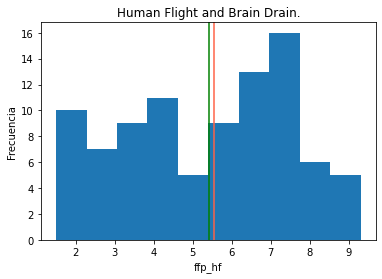

In [ ]:
makeHistPlot(subSample, 'ffp_hf', True, True)
plt.title('Human Flight and Brain Drain')

Text(0.5, 1.0, 'Quality of the educational system')

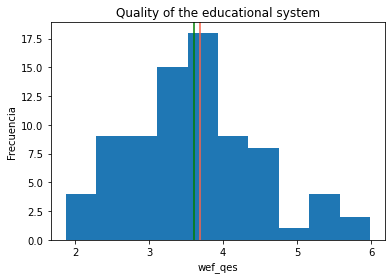

In [ ]:
makeHistPlot(subSample, 'wef_qes', True, True)
plt.title('Quality of the educational system')

Text(0.5, 1.0, 'Government expenditure on education, total (% of GDP)')

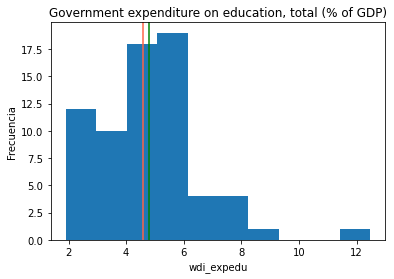

In [ ]:
makeHistPlot(subSample, 'wdi_expedu', True, True)
plt.title('Government expenditure on education, total (% of GDP)')

Text(0.5, 1.0, 'School enrollment, secondary (% net)')

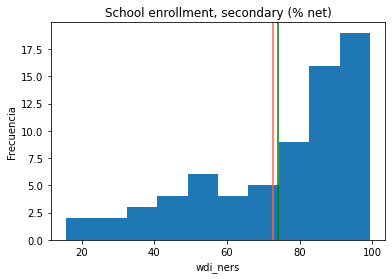

In [ ]:
makeHistPlot(subSample, 'wdi_ners', True, True)
plt.title('School enrollment, secondary (% net)')

<li>¿En qué variables la media de la submuestra es mayor a la de la muestra completa?</li>

Las Variables de la submuestra que presentan una media mayor a la de la muestra completa son: <code>wdi_ners</code> y <code>wdi_expedu</code> 

### Genere una función que devuelva un dotplot

<li>La función debe contener los siguientes argumentos como argumentos:
<ul>
<li><code>dataframe</code>: La tabla de datos donde buscar las variables.</li>
<li><code>plot_var</code>: La variable a analizar y extraer las medias.</li>
<li><code>plot_by</code>: La variable agrupadora.</li>
<li><code>global_stat</code>: Booleano. Si es True debe graficar la media global de la
variable. Por defecto debe ser <code>False</code>.</li>
<li><code>statistic</code>: Debe presentar dos opciones. mean para la media y median para
la mediana. Por defecto debe ser mean.</li>
</ul>
</li>


In [ ]:
def makeDotPlot(dataframe, plot_var, plot_by, global_state = False, statistic = 'mean'):
    plt.plot(dataframe[plot_var], dataframe[plot_by], marker='o', linestyle='none')
    plt.xlabel(plot_var)
    plt.ylabel(plot_by)
    if global_state:
        if statistic == 'mean':
            plt.axvline(df[plot_var].mean(), color="red")
        elif statistic == 'median':
            plt.axvline(df[plot_var].median(), color="orange")

<li>Implemente la función en las 3 variables con una menor cantidad de datos perdidos.</li>

Si Descartamos las variables discretas, las 3 variables con menor cantidad de datos perdidos son (basados en el análisis anterior): <code>'gle_cgdpc', 'undp_hdi', 'ffp_hf'</code>


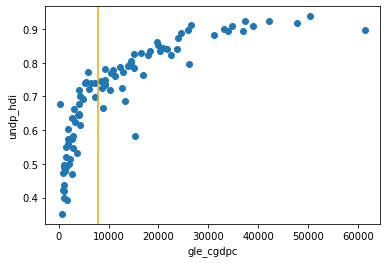

In [ ]:
makeDotPlot(subSample, 'gle_cgdpc', 'undp_hdi', True, 'median')

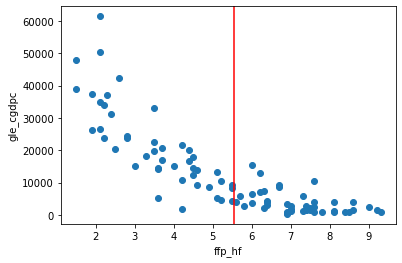

In [ ]:
makeDotPlot(subSample, 'ffp_hf', 'gle_cgdpc', True, 'mean')

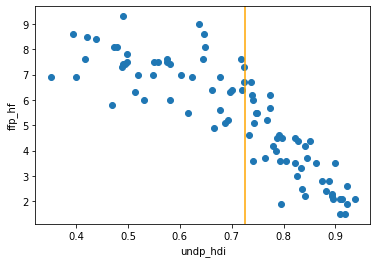

In [ ]:
makeDotPlot(subSample, 'undp_hdi', 'ffp_hf', True, 'median')

### 6. Guarde la base de datos

<li>La submuestra creada tiene un método llamado <code>to_csv</code>.
Acceda a este y guarde la base de datos con la siguiente nomenclatura:
<code>subsample_&lt;iniciales&gt;_demo.csv</code>.
(Subela a la plataforma, junto al desafío)</li>

In [ ]:
subSample.to_csv('./subsample_bm_demo.csv')